In [1]:
# Import the necessary libraries.h
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))
marketing_analysis = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
marketing_analysis

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# First, look at its main features (head, shape, info).
import pandas as pd

def dataframe_summary(df):
    # Mostrar las primeras 5 filas
    print("Primeras 5 filas:")
    display(df.head())

    # Mostrar la forma del DataFrame
    print("Forma del DataFrame:", df.shape)

    # Obtener información sobre el DataFrame
    print("Información del DataFrame:")
    df.info()
    



In [14]:
dataframe_summary(marketing_analysis)


Primeras 5 filas:


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Forma del DataFrame: (9134, 24)
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code            

In [11]:
# Rename the columns so they follow the PE8 (snake case).
import janitor

# Renombrar columnas en snake case
marketing_analysis = marketing_analysis.rename(columns=str.lower)
marketing_analysis = marketing_analysis.clean_names()

print(marketing_analysis)

     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor           2/24/11         Employed 

In [13]:
# Fix the data types of any other column/columns as you might see necessary.
# Note that sometimes there are some features you might want to use as categorical,
#but they are read as numerical by python (and vice versa). For eg.,
# if there's a column with year values like 2020, 2021, 2022, etc.,
#this column might be read as numerical by python, but you would want to use that column 
#as categorical data. Hint: One thing you can try is to change date column to datetime format.


def change_to_datetime(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    return df

marketing_analysis = change_to_datetime(marketing_analysis, "effective_to_date")

# Imprimir el DataFrame resultante
print(marketing_analysis.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

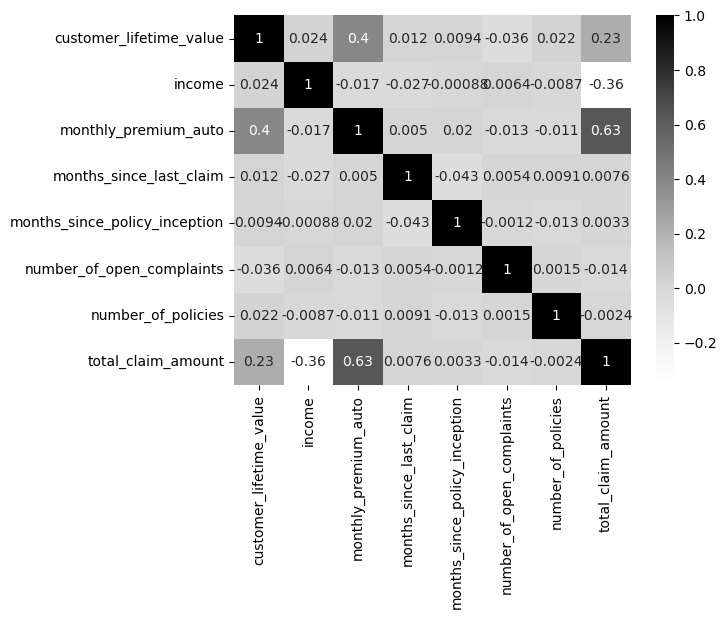

In [17]:
# Plot a correlation matrix, and comment on what you observe.

correlation_matrix = marketing_analysis.corr()

# Crear el mapa de calor de la matriz de correlación con números y esquema de colores personalizado
sns.heatmap(correlation_matrix, cmap="Greys", annot=True)

# Mostrar el gráfico
plt.show()

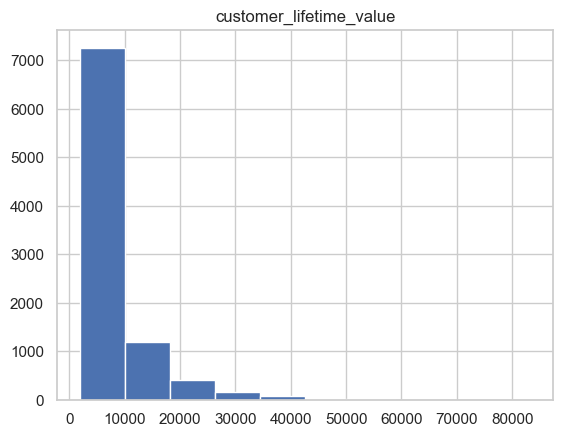

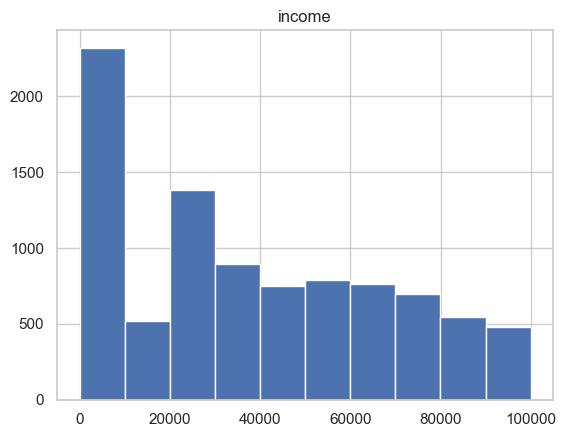

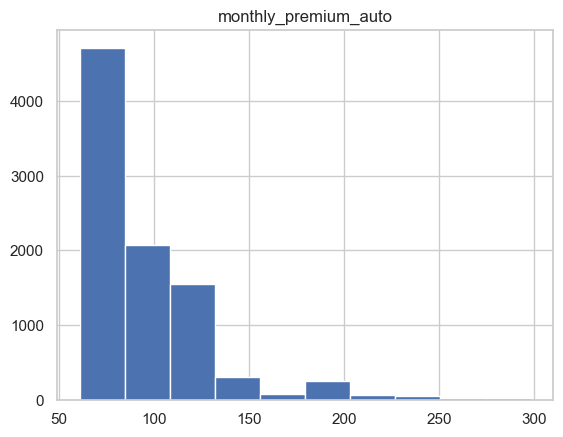

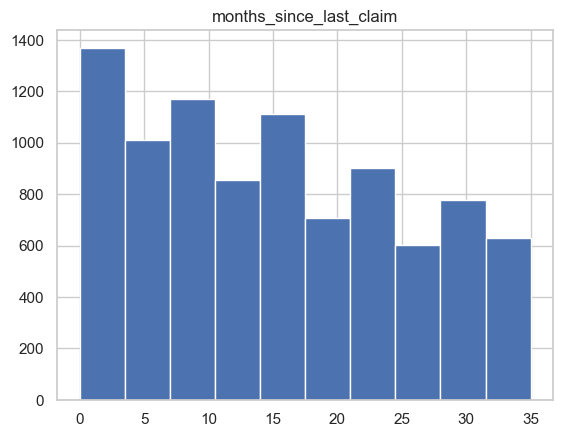

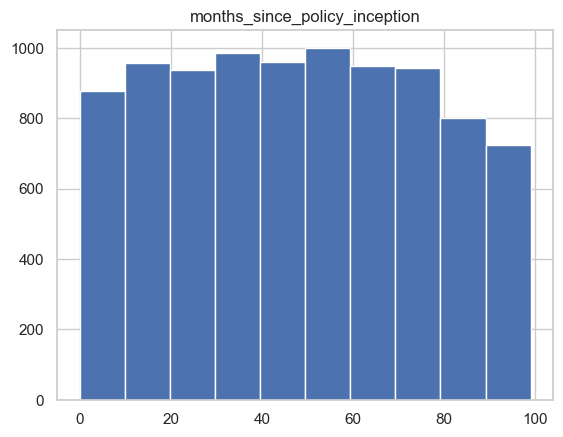

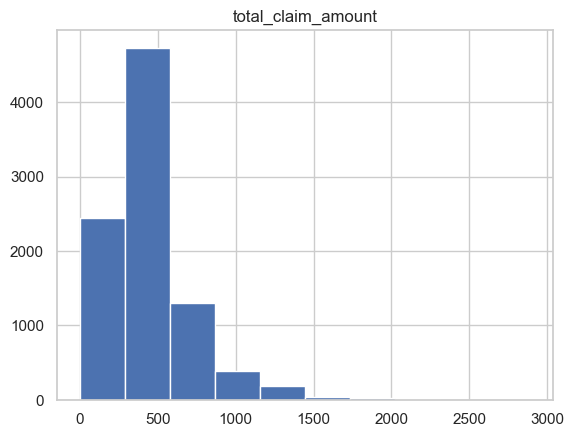

In [38]:
# Plot every continuous variable. Comment what you can see in the plots.
df_numeric_cols =  marketing_analysis.drop(['number_of_policies','number_of_open_complaints'], axis=1)
numeric_cols = df_numeric_cols.select_dtypes(include=["float64", "int64"]).columns



# Crear un histograma para cada columna numérica
for col in numeric_cols:
    marketing_analysis[col].hist()
    plt.title(col)
    plt.show()

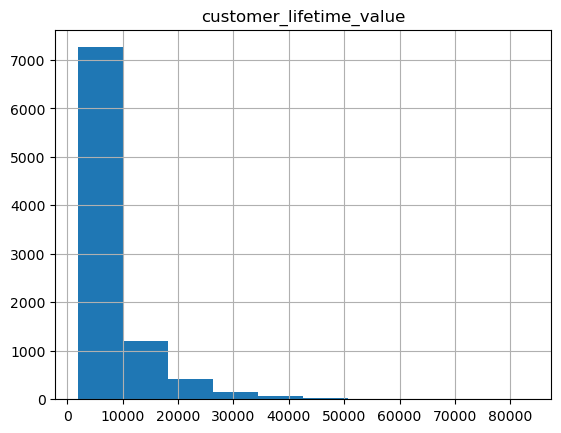

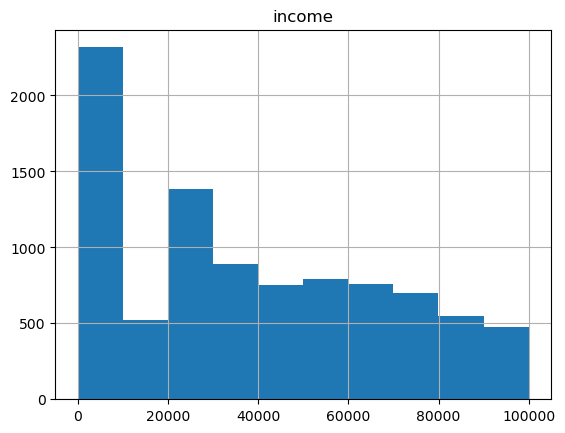

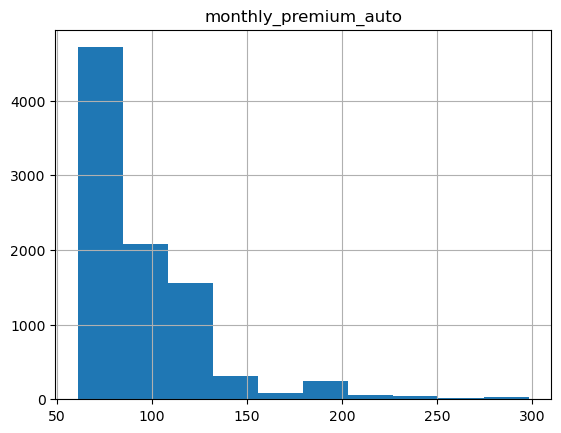

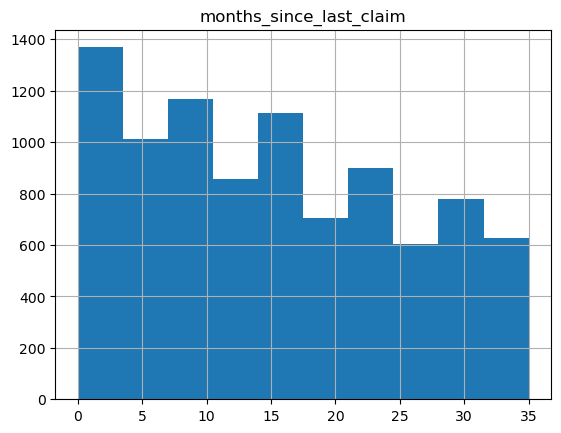

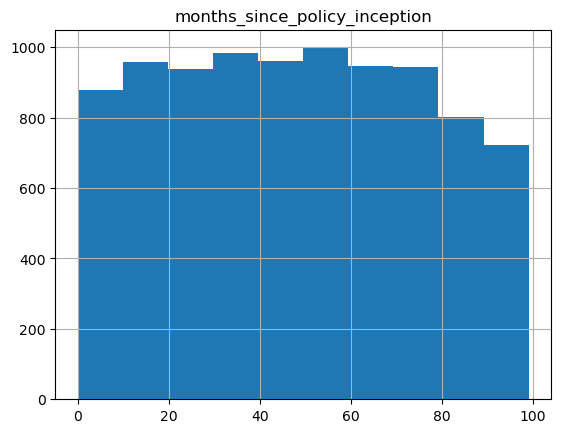

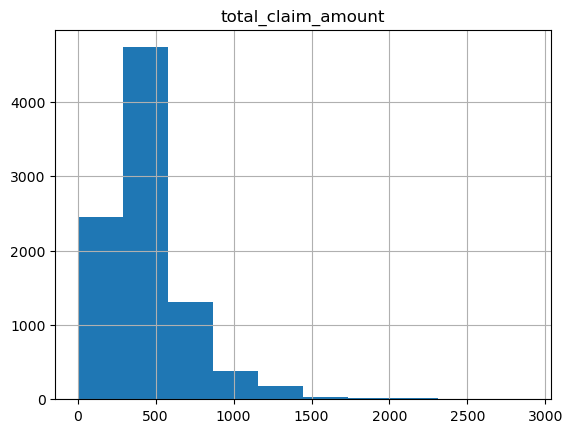

In [28]:
# Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

df_cat_cols =  marketing_analysis.drop(['customer'], axis=1)
cat_cols = df_cat_cols.select_dtypes(include=["object"]).columns



# Crear un histograma para cada columna numérica
for col in numeric_cols:
    marketing_analysis[col].hist()
    plt.title(col)
    plt.show()

C:\Users\raulo\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\raulo\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


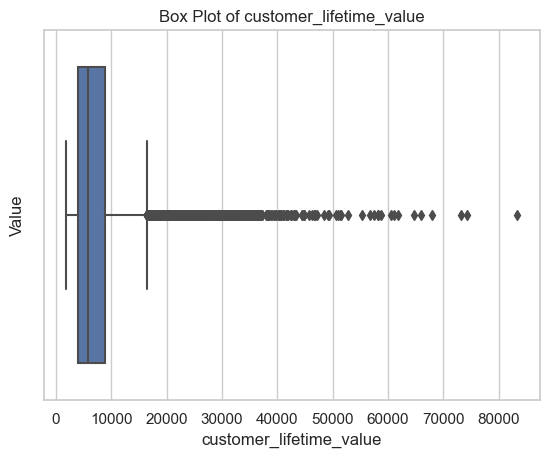

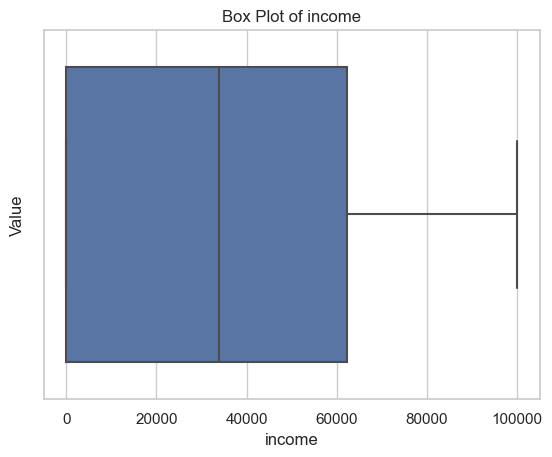

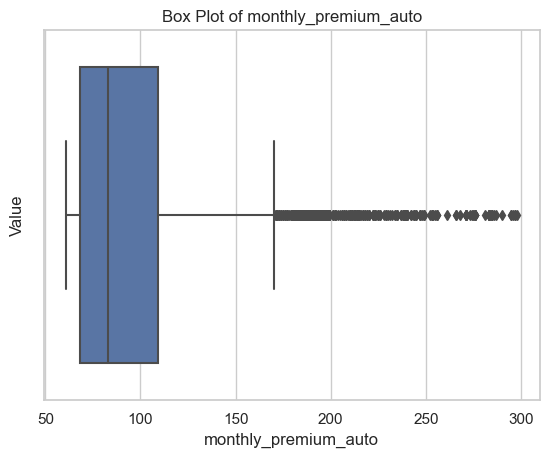

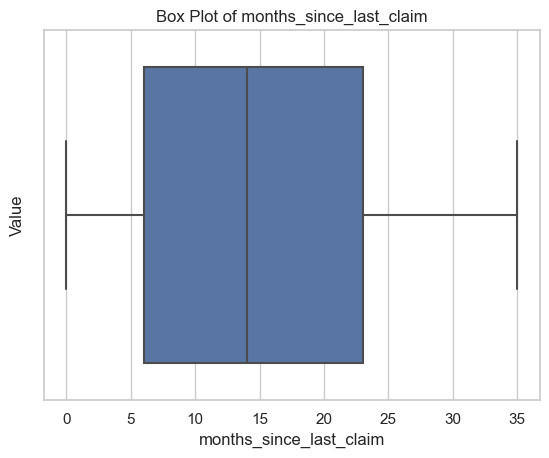

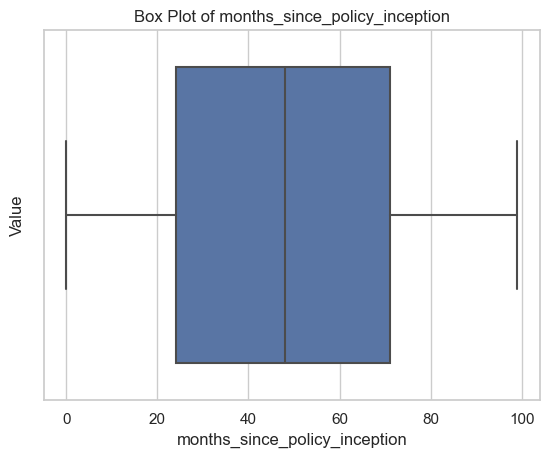

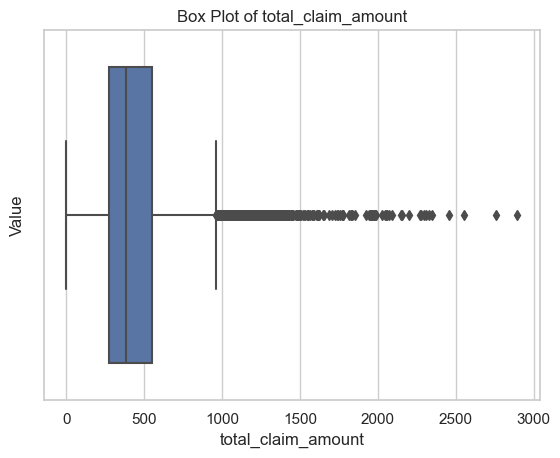

In [50]:
# Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.
df_cont_cols =  marketing_analysis.drop(['customer','number_of_policies','number_of_open_complaints'], axis=1)
df_cont_cols = df_cont_cols.select_dtypes(include=["float64", "int64"])


import seaborn as sns

def plot_boxplots(data):
    """
    Plot a box plot for each column in a given DataFrame.

    Parameters:
    data (pandas.DataFrame): The DataFrame containing the columns to plot.

    Returns:
    None
    """
    sns.set(style="whitegrid")
    for column in data.columns:
        if data[column].dtype != "object":
            ax = sns.boxplot(data[column])
            ax.set_title(f"Box Plot of {column}")
            ax.set_xlabel(column)
            ax.set_ylabel("Value")
            plt.show()

plot_boxplots(df_cont_cols)

In [52]:
def remove_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    min_percentile = q1 - 1.5 * iqr
    max_percentile = q3 + 1.5 * iqr
    cleaned_data = np.clip(data, min_percentile, max_percentile)
    return cleaned_data

In [53]:
remove_outliers(df_cont_cols)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,9840.861335,69,32,5,384.811147
1,6979.535903,0.000000,94,13,42,1131.464935
2,9840.861335,9840.861335,108,18,38,566.472247
3,7645.861827,0.000000,106,18,65,529.881344
4,2813.692575,9840.861335,73,12,44,138.130879
...,...,...,...,...,...,...
9129,9840.861335,9840.861335,73,18,89,198.234764
9130,3096.511217,9840.861335,79,14,28,379.200000
9131,8163.890428,0.000000,85,9,37,790.784983
9132,7524.442436,9840.861335,96,34,3,691.200000


In [54]:
# Check all columns for NaN values. Decide what (if anything) you will need to do with them.
nan_counts = marketing_analysis.isna().sum(axis=0)

print(nan_counts)


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64
